In [ ]:
#importing requires modules
import pandas as pd
import seaborn as sbn 
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import files
uploaded=files.upload()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv
Saving Valid.csv to Valid.csv
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#loading the dataset
train_data = pd.read_csv("Train.csv")
valid_data = pd.read_csv("Valid.csv")
test_data = pd.read_csv("Test.csv")

In [ ]:
#Exploratory Data Analysis
train_data.columns

Index(['text', 'label'], dtype='object')

In [ ]:
train_data.shape

(40000, 2)

In [ ]:
train_data.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
train_data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


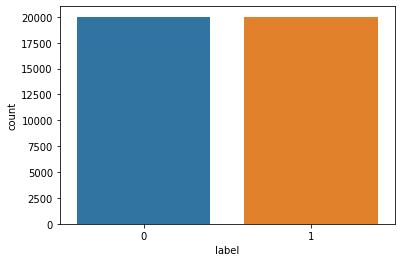

In [ ]:
sbn.countplot(x='label',data=train_data)

In [ ]:

def text_preprocessing(data):
    data['text'] = data['text'].str.lower()
    punctuation = string.punctuation
    data['text'] = data['text'].str.translate(str.maketrans('','',punctuation))
    stop_words = set(stopwords.words('english'))
    stop_words.update(["film","movie","one","br","href","well","show"])
    data['text'] = data['text'].apply(lambda x:' '.join([w for w in x.split() if w not in stop_words]))
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    def lemmatize(data):
        lemmatizer = WordNetLemmatizer()
        data['text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w,get_wordnet_pos(w)) for w in word_tokenize(x)]))
        return data
    lemmatize(data)

text_preprocessing(train_data)
train_data.head()


,text,label
0,grow b 1965 watch love thunderbird mate school...,0
1,put dvd player sat coke chip expectation hop w...,0
2,people know particular time past feel need try...,0
3,though great interest biblical bore death ever...,0
4,im die hard dad army fan nothing ever change g...,1


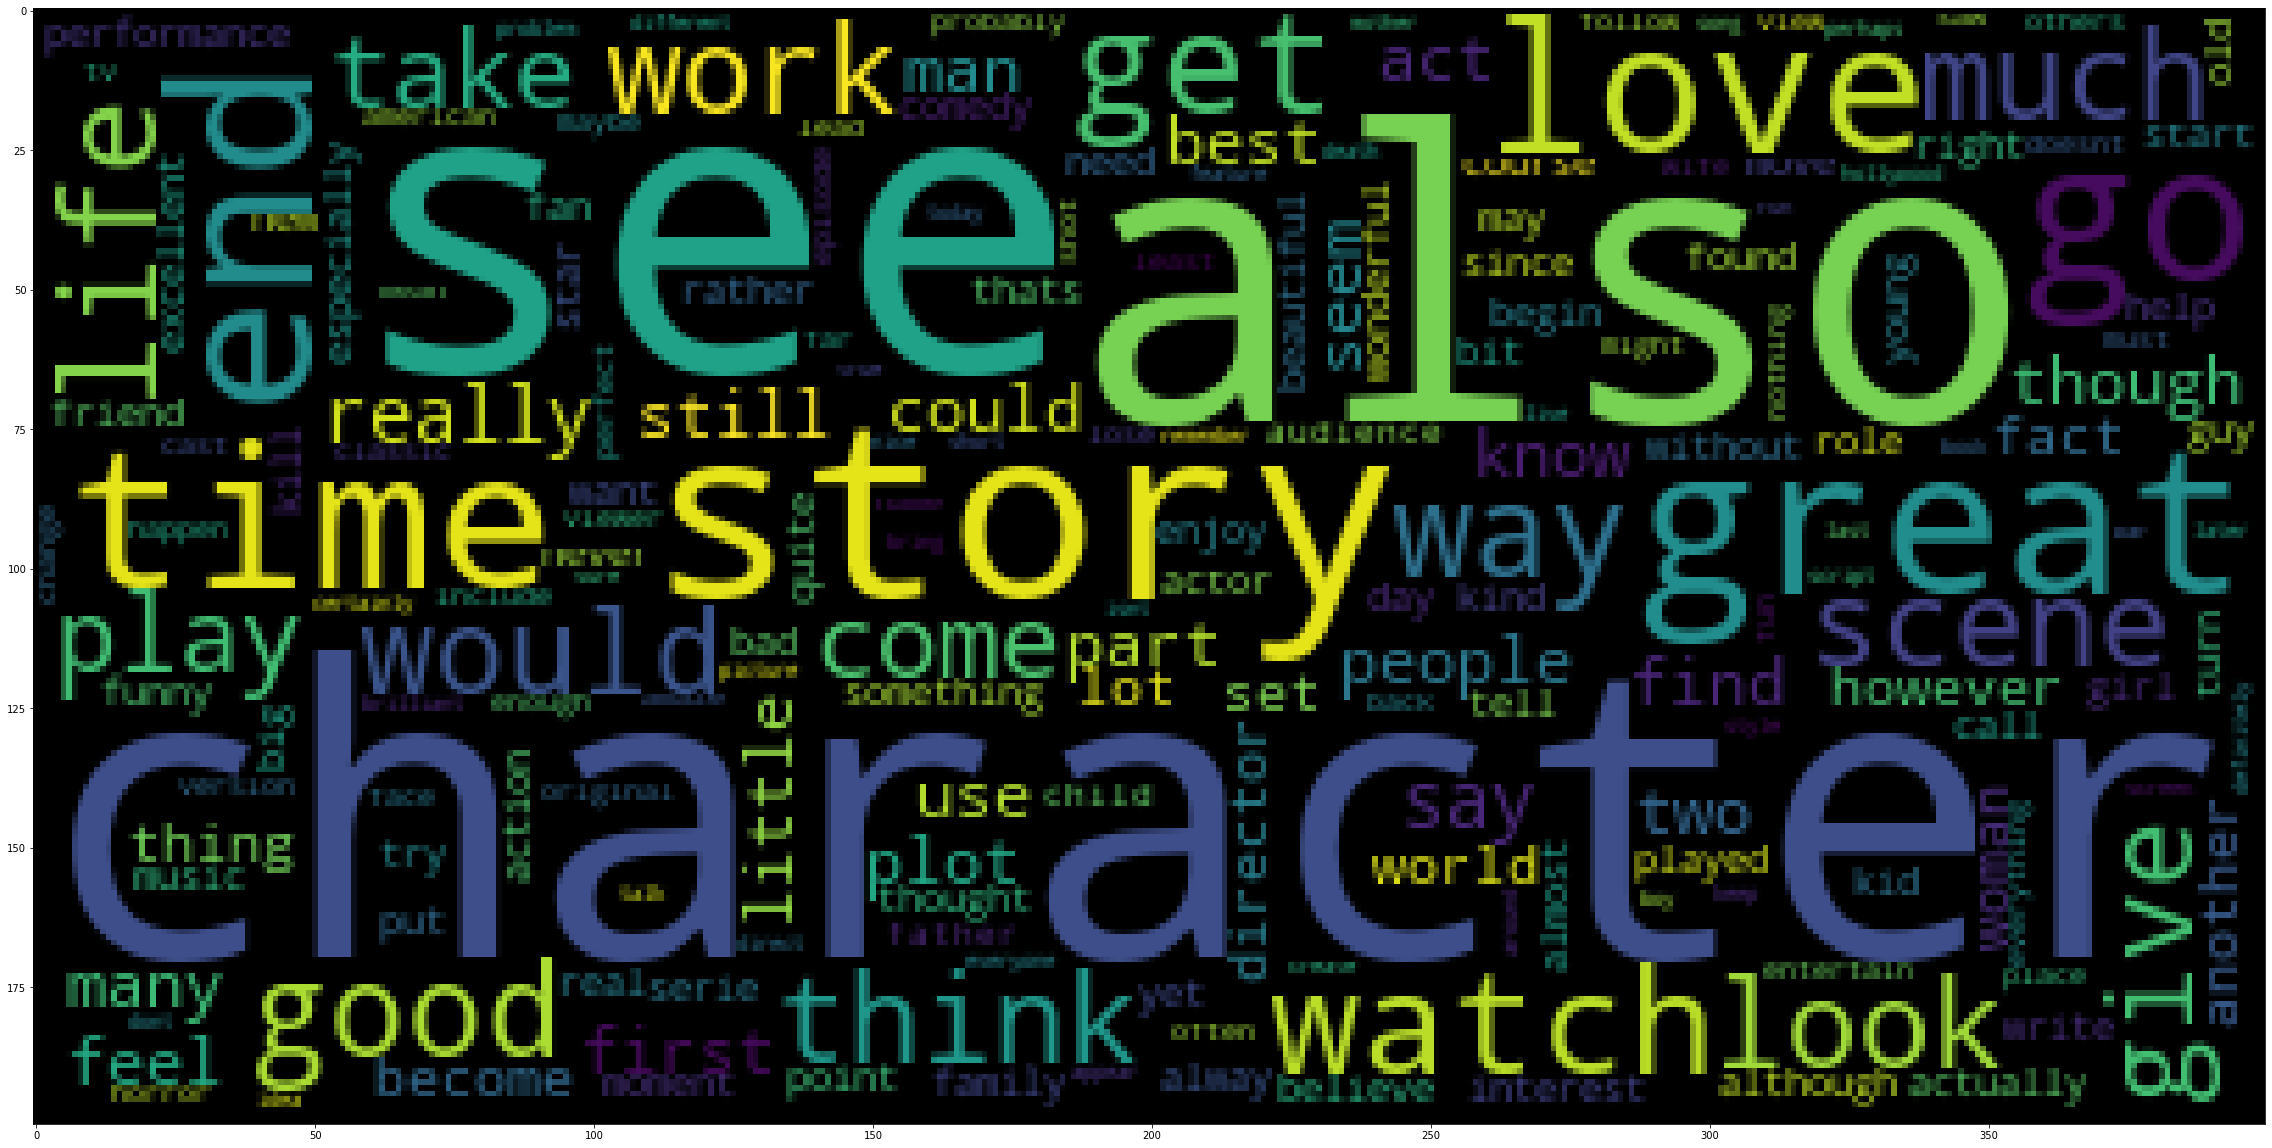

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)

positive = train_data['text'][train_data['label']==1]
negative = train_data['text'][train_data['label']==0]

pos_wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(positive))
neg_wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(negative))

plot_cloud(pos_wordcloud)

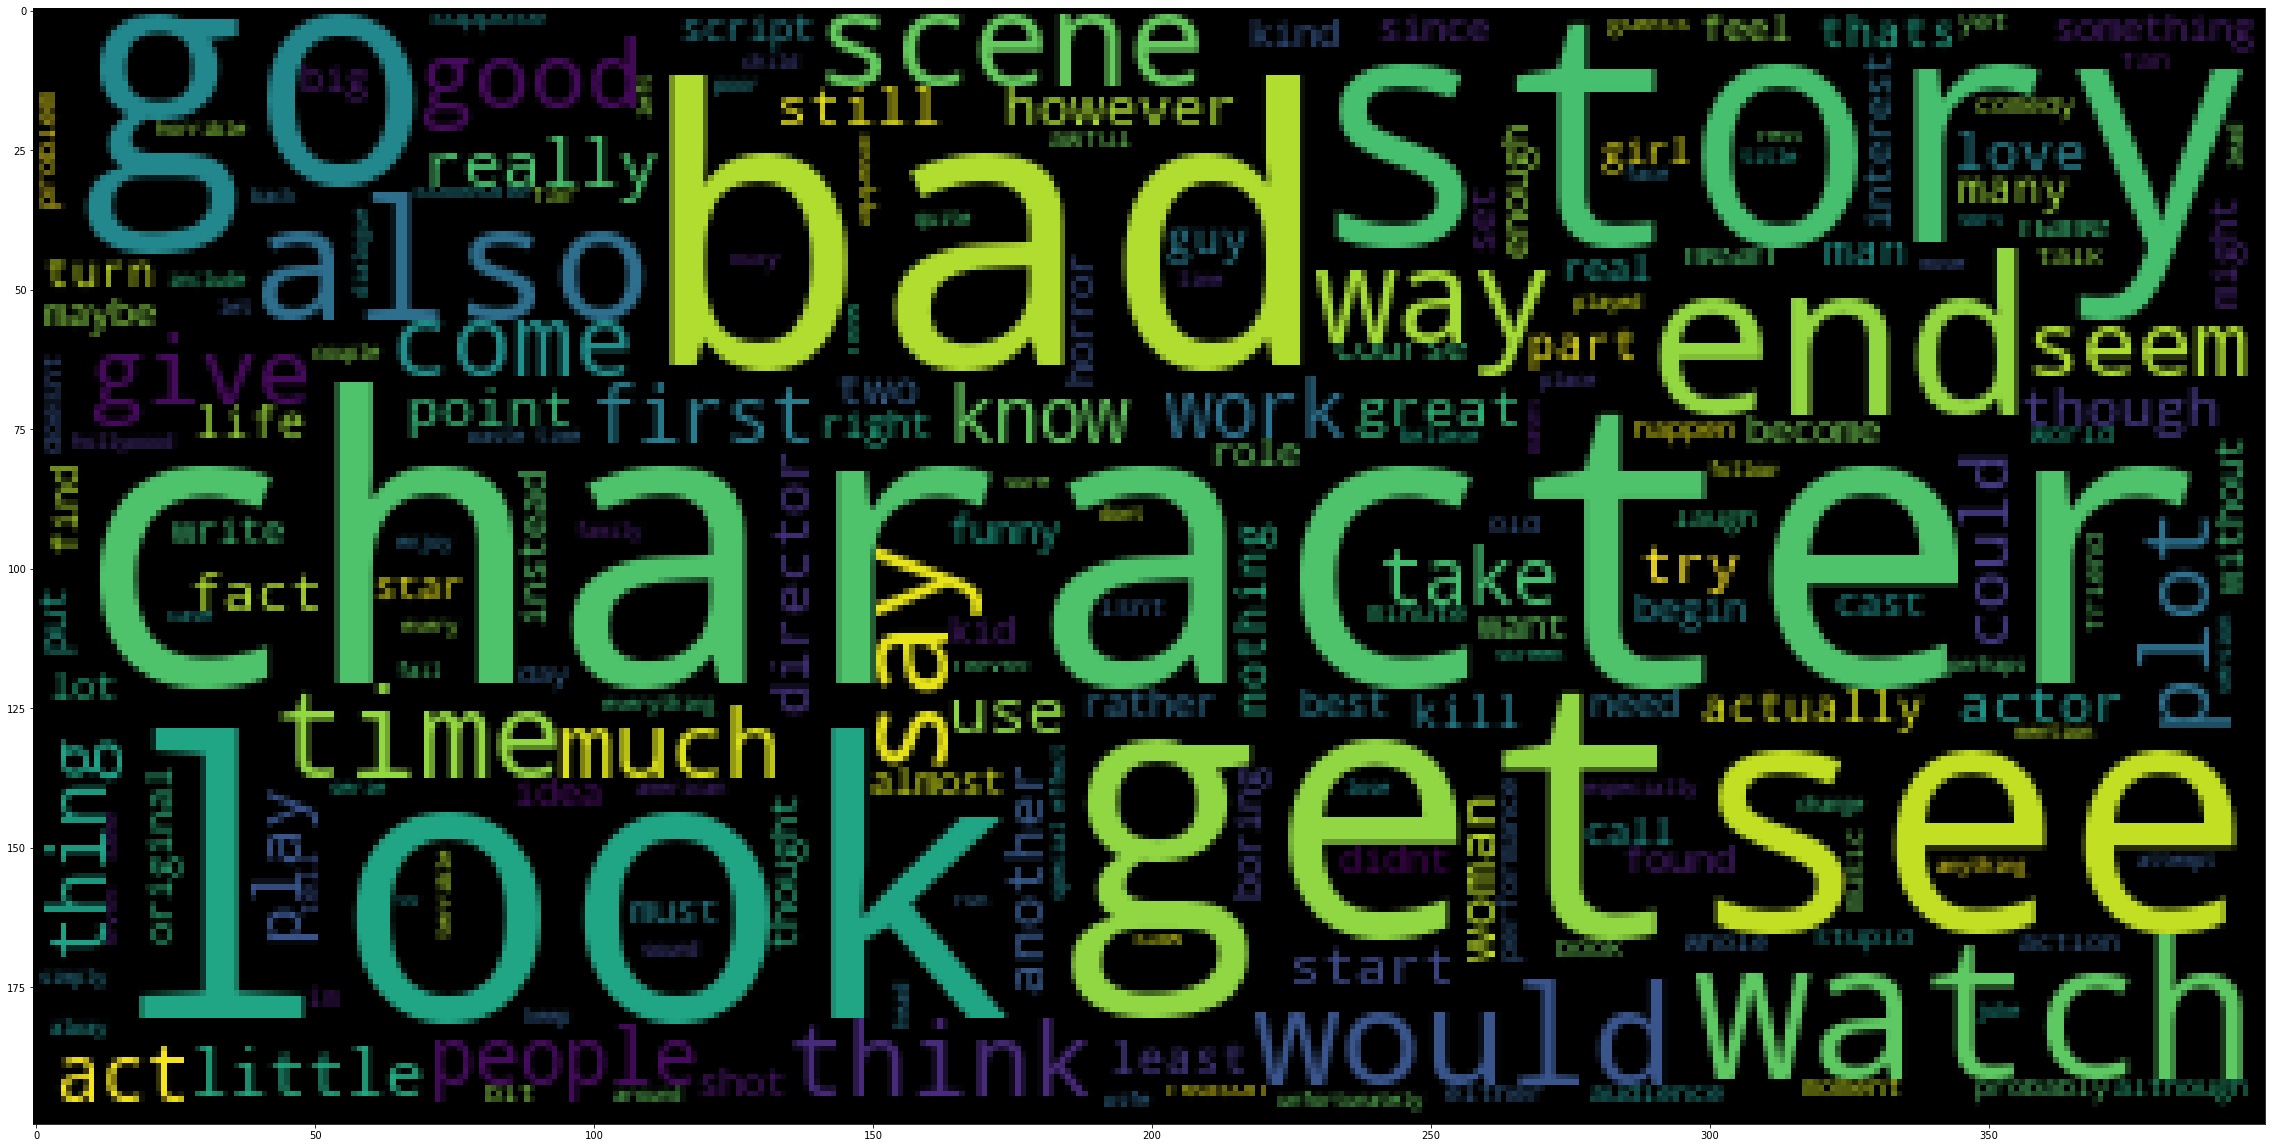

In [ ]:
plot_cloud(neg_wordcloud)

In [ ]:
text_preprocessing(test_data)
lemmatize(test_data)
text_preprocessing(valid_data)
lemmatize(valid_data)

,text,label
0,14 year since sharon stone award viewer legcro...,0
1,someone need car payment truly awful jean clau...,0
2,guideline state comment must contain minimum f...,0
3,muddle mishmash clichés recent cinema promisin...,0
4,stan laurel become small half alltime great co...,0
...,...,...
4995,man love really take back kid day teacher stil...,1
4996,recovery incredibly move piece work handle dev...,1
4997,take crook joint seem exceedingly difficult ta...,1
4998,futz preserve experimental theatre movement ne...,1


In [ ]:
tfidf_vectoriztion = TfidfVectorizer(max_features=1000,max_df=0.7,min_df=5)
x = tfidf_vectoriztion.fit_transform(train_data['text']).toarray()
y = train_data['label']
import numpy as np
x_vaild = tfidf_vectoriztion.fit_transform(valid_data['text']).toarray()
y_valid_data = valid_data['label']
y_valid = np.array(y_valid_data).reshape(-1,1)
x_test = tfidf_vectoriztion.fit_transform(test_data['text']).toarray()
y_test_data = test_data['label']
y_test = np.array(y_test_data).reshape(-1,1)

In [ ]:
classifier = GaussianNB()
classifier.fit(x,y)

y_prediction_valid = classifier.predict(x_vaild)
print('Valid accuracy:',accuracy_score(y_valid,y_prediction_valid)*100)
y_predtiction_test = classifier.predict(x_test)
print('Test Accuracy:',accuracy_score(y_test,y_predtiction_test)*100)

Valid accuracy: 64.94
Test Accuracy: 57.32000000000001
